# Classification using multilayer neural network


Import Necessary Libraries: Import the necessary libraries such as pandas, numpy, sklearn, and tensorflow.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


Load the Dataset: Load the breast cancer dataset.

Here we drop 2 columns because they did not give us any data

In [ ]:
# Load the breast cancer dataset
data = pd.read_csv('/content/drive/MyDrive/breast cancer.csv')

data = data.drop('Unnamed: 32', axis=1)
data = data.drop('id', axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here we check whether we have any missing values or not

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


We have char in `'diagnosis'` coulumn so we need to encode it

M --> 1

B --> 0

In [ ]:
encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

This part standardizes the values in specific columns of a pandas DataFrame data using scikit-learn's StandardScaler class. The columns to be standardized are specified in the columns list.

In [ ]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                     'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                     'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                     'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                     'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                     'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
sc = StandardScaler()
data[columns] = sc.fit_transform(data[columns])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Here we make correlation matrix's heat map so that we can analyze our data

<ipython-input-7-483b74684be9>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


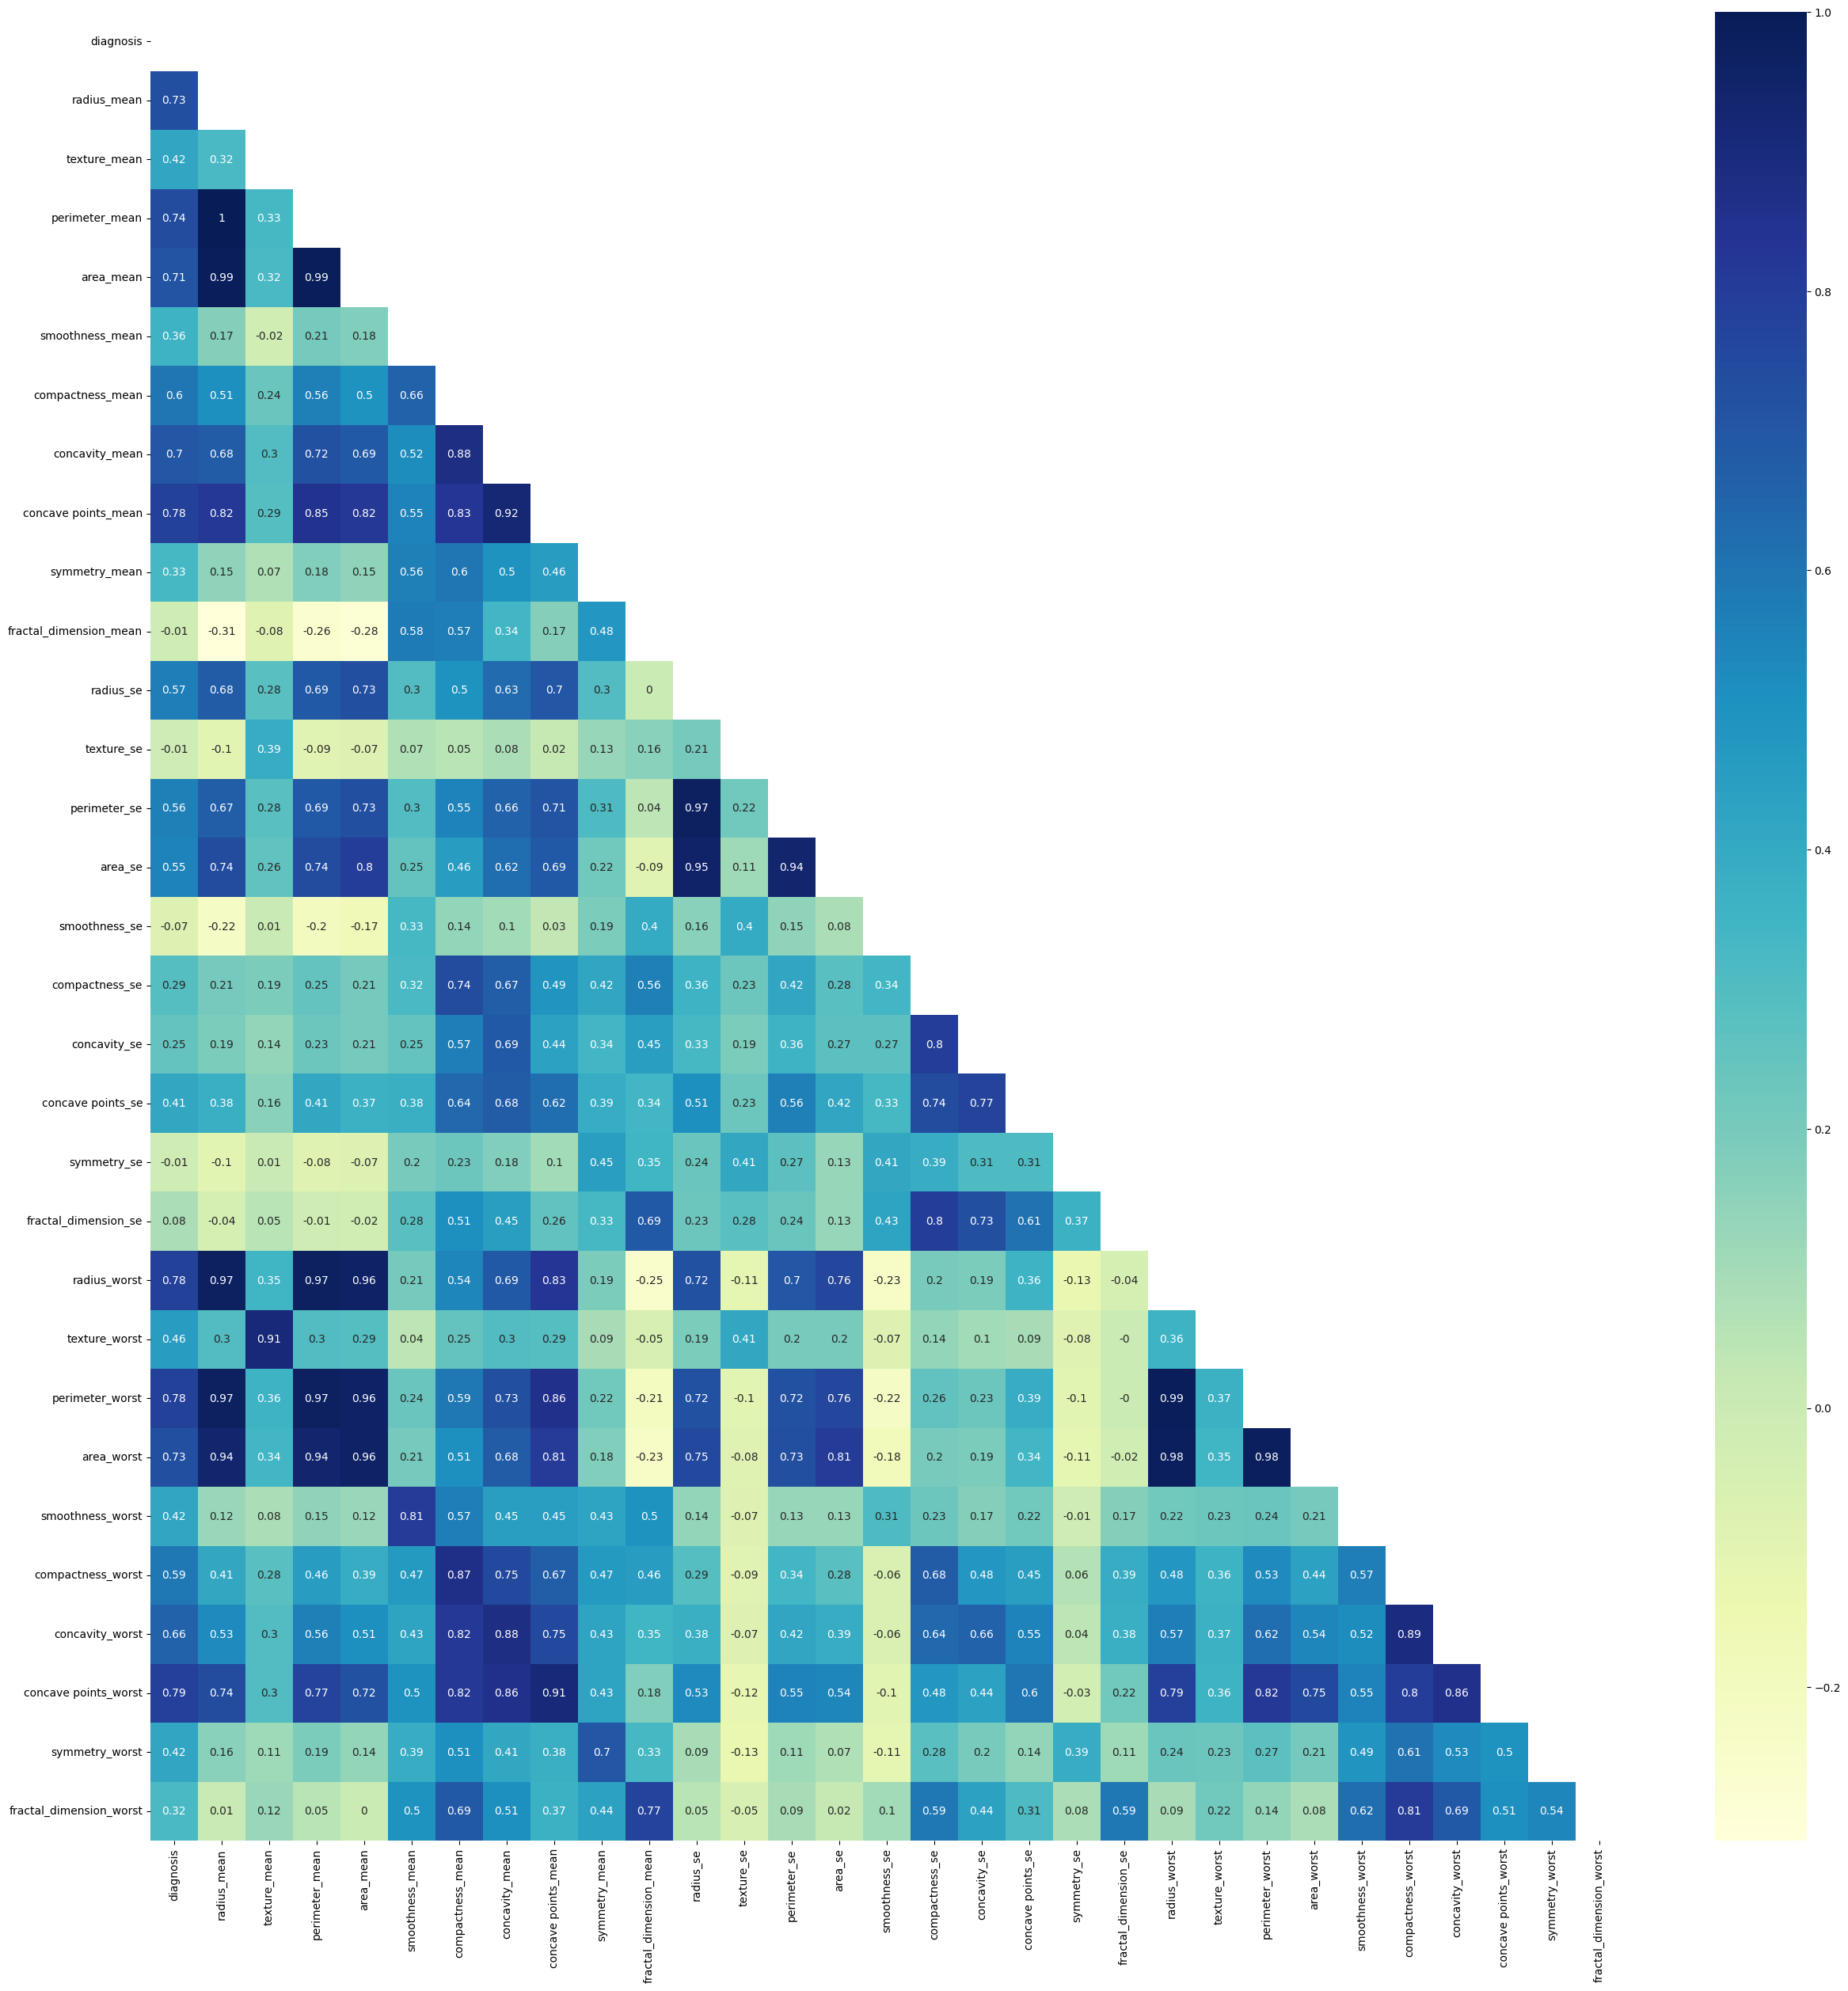

In [ ]:
# Compute the correlation matrix using the corr() function
correlation_matrix = data.corr().round(2)

#Create a boolean mask to hide the upper triangle of the heatmap, which contains duplicate information
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Create a matplotlib figure and axis object for the heatmap, with a large size of 30*30 inches
f, ax = plt.subplots(figsize=(30,30))

sns.heatmap(correlation_matrix, mask = mask, cmap='YlGnBu', annot = True)
plt.show()


Here we can see the correlation between '`diagnosis`' and other features

In [ ]:
corr_with_label = correlation_matrix['diagnosis'].sort_values(ascending=False)
print(corr_with_label)

diagnosis                  1.00
concave points_worst       0.79
radius_worst               0.78
concave points_mean        0.78
perimeter_worst            0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
symmetry_worst             0.42
smoothness_worst           0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothness_se             -0.07
Name: di

Here we drop some features that are so correlated to each other.

I delete most correlated of each feature which is higher and others

In [ ]:
dropped = ['concavity_worst', 'compactness_mean', 'concave points_mean', 'symmetry_worst', 'texture_worst', 'compactness_se', 'fractal_dimension_worst', 'concavity_mean', 'perimeter_se', 'area_mean', 'smoothness_worst', 'radius_worst', 'area_worst', 'compactness_worst', 'perimeter_mean', 'concavity_se', 'concave points_se', 'area_se', 'perimeter_worst', 'concave points_worst']

data = data.drop(dropped, axis=1)

Here we have an updated heat map

<ipython-input-10-483b74684be9>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


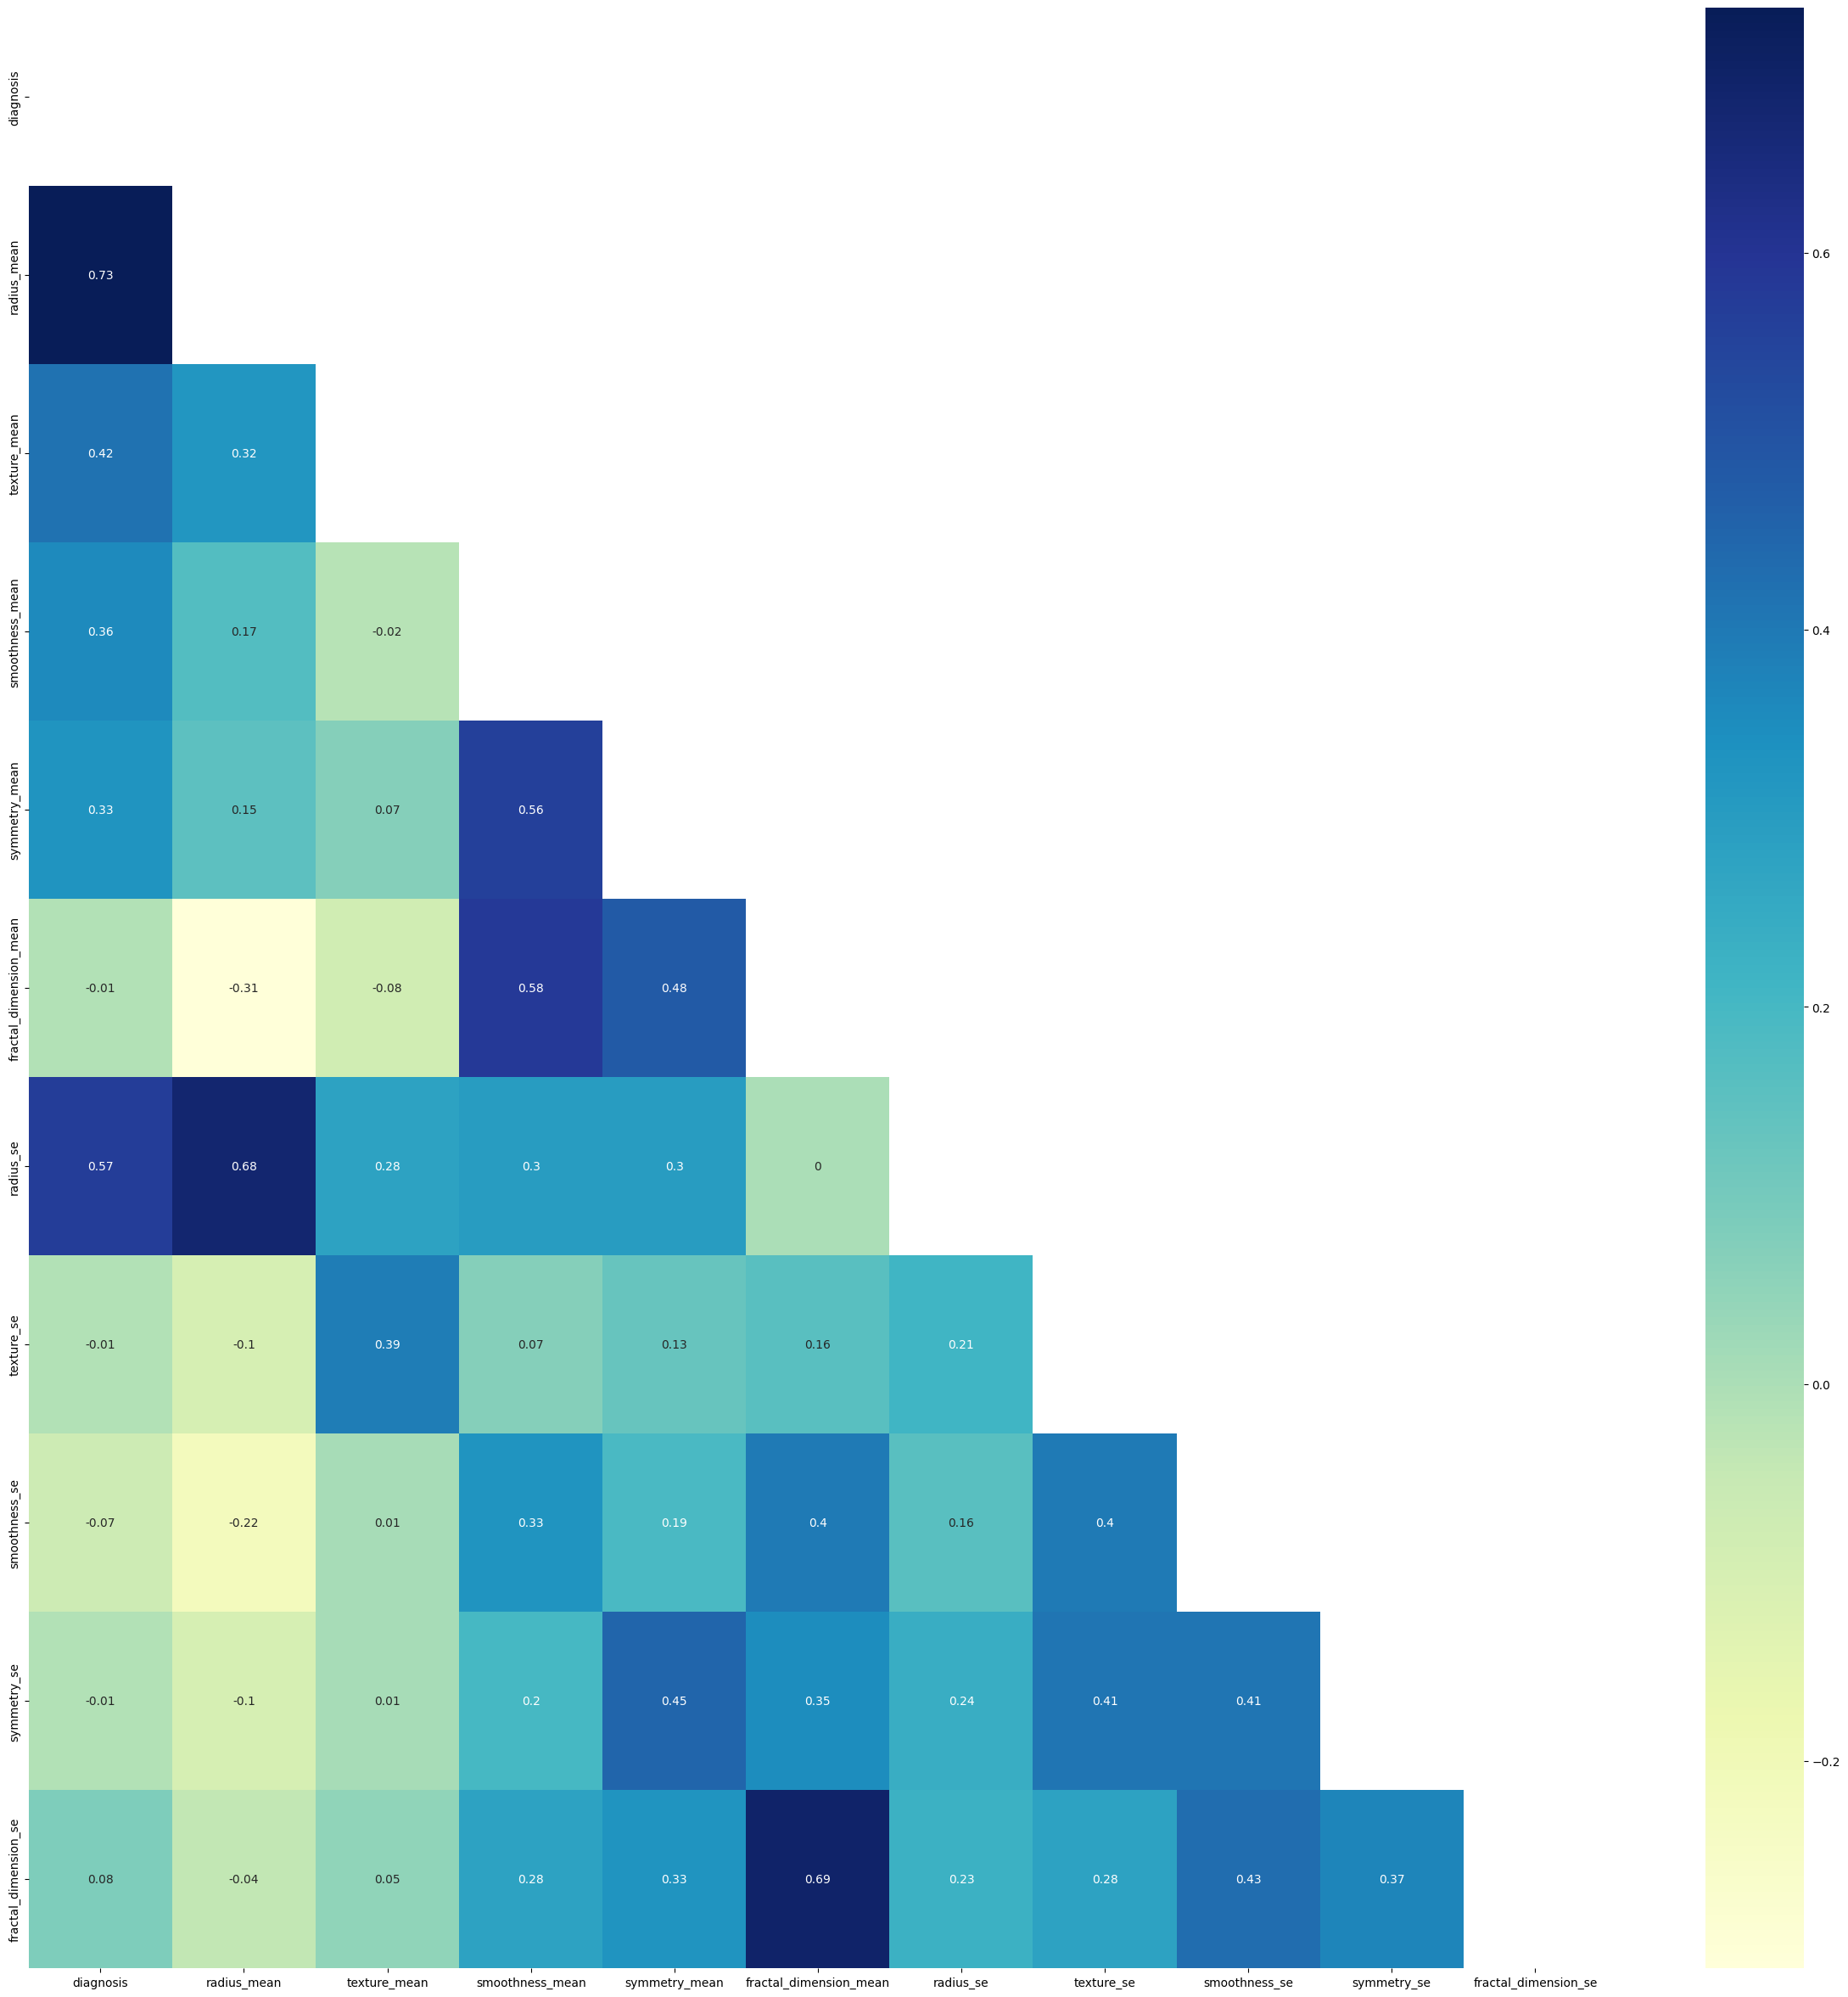

In [ ]:
# Compute the correlation matrix using the corr() function
correlation_matrix = data.corr().round(2)

#Create a boolean mask to hide the upper triangle of the heatmap, which contains duplicate information
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Create a matplotlib figure and axis object for the heatmap, with a large size of 30*30 inches
f, ax = plt.subplots(figsize=(30,30))

sns.heatmap(correlation_matrix, mask = mask, cmap='YlGnBu', annot = True)
plt.show()


Here we split our data into 80% for train and 20% for test

In [ ]:
# Split the dataset into features (X) and target (y)
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



print("Train set size :", len(X_train))

print("Test set size :", len(X_test))

Train set size : 455
Test set size : 114


This code defines and trains a multi-layer perceptron (MLP) model using TensorFlow 2.0. The model has an input layer, two hidden layers with 32 and 32 neurons respectively, and an output layer with a single neuron. The activation functions used for the hidden layers are the rectified linear unit (ReLU), while the output layer uses the sigmoid activation function.

The input dimension of the model is set to the number of features in the training data X_train.

The model is compiled using the compile() method, which specifies the optimizer, loss function, and evaluation metric to be used during training. In this code, the Adam optimizer is used, the loss function used is binary cross-entropy, and the accuracy metric is used to evaluate the performance of the model.

The model is then trained on the training data X_train and labels y_train using the fit() method, with a batch size of 32 and for 50 epochs. The validation split of 0.2 means that 20% of the training data is used for validation during training.

In [ ]:
# Define the input dimension
input_dim = X_train.shape[1]  # number of columns or features in the input data X_train

# Define the architecture of the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2)  # Replace y_train with your actual training labels

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.6839 - accuracy: 0.5357 - val_loss: 0.6224 - val_accuracy: 0.6923
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.8187 - val_loss: 0.5361 - val_accuracy: 0.8132
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.8709 - val_loss: 0.4636 - val_accuracy: 0.8242
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8956 - val_loss: 0.4063 - val_accuracy: 0.8462
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.9093 - val_loss: 0.3613 - val_accuracy: 0.8791
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.9258 - val_loss: 0.3259 - val_accuracy: 0.8681
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.9368 - val_loss: 0.2989 - val_accuracy: 0.8791
Epoch 8/50
12/12 [=

This code evaluates the performance of a trained MLP model on the training and test datasets.

The evaluate() method is used to compute the loss and accuracy of the model on the training and test datasets. The training data and labels are passed to X_train and y_train respectively, while the test data and labels are passed to X_test and y_test respectively.

The resulting loss and accuracy values for the training and test datasets are stored in the variables train_loss, train_accuracy, test_loss, and test_accuracy.

In [ ]:
# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the accuracy of each model on train and test data
print("Train Accuracy:", train_accuracy)
print("Train loss:", train_loss)

print("Test Accuracy:", test_accuracy)
print("Test loss:", test_loss)


4/4 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9561
Train Accuracy: 0.9736263751983643
Train loss: 0.09292583912611008
Test Accuracy: 0.9561403393745422
Test loss: 0.15164270997047424


This part trains and evaluates a MLP model with different combinations of learning rates and number of epochs.

The learning rates are specified in a list learning_rates with two values (**0.001** and **0.01**), and the number of epochs are specified in a list epochs with two values (**50** and **100**).

The code then loops over each combination of learning rate and number of epochs using nested for-loops. For each combination, the learning rate of the optimizer is set to the current learning rate value using model.optimizer.lr.assign(lr).

The model is then trained on the training data X_train and labels y_train for the current number of epochs using the fit() method. The training is done with a validation split of 0.2, meaning that 20% of the training data is used for validation during training.

After training, the accuracy of the model is evaluated on both the training and test datasets using the evaluate() method. The resulting accuracy values are printed using the print() function.

By training the model with different combinations of learning rates and number of epochs, this code can help to identify which combination of hyperparameters produces the best performance on the test dataset.

In [ ]:
# Specify two different values for learning rate and number of epochs
learning_rates = [0.001, 0.01]
epochs = [50, 100]

# Train the model with different combinations of learning rate and number of epochs
for lr in learning_rates:
    for epoch in epochs:
        print(f"Training with learning rate: {lr} and epochs: {epoch}")
        model.optimizer.lr.assign(lr)
        history = model.fit(X_train, y_train, epochs=epoch, validation_split=0.2, verbose=0)

        # Evaluate the model on train and test data
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

        # print(f"Train accuracy: {train_accuracy:.2f}")
        # print(f"Train loss: {train_loss:.2f}")
        # print(f"Test accuracy: {test_accuracy:.2f}")
        # print(f"Test loss: {test_loss:.2f}\n")
        y_pred = model.predict(X_test)
        y_pred = np.round(y_pred).flatten()
        cm = confusion_matrix(y_test, y_pred)

        print("Confusion Matrix:")
        print(cm)

        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)

Training with learning rate: 0.001 and epochs: 50
4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[68  3]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Training with learning rate: 0.001 and epochs: 100
4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[69  2]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Training with learning 

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[67  4]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
# Evaluate the performance of the trained MLP model on the test set

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[69  2]
 [ 4 39]]
Recall: 0.9069767441860465
Precision: 0.9512195121951219
F1 Score: 0.9285714285714286


Epoch = 50, Learning rate = 0.01 is the best among others with:

Train accuracy: 0.98

Train loss: 0.18

Test accuracy: 0.92

Test loss: 0.60


After analyzing the four models, it can be concluded that increasing the number of epochs did not make a significant difference in this case. However, it is apparent that the models with fewer epochs performed better.

Conversely, increasing the learning rate resulted in a more accurate model.


**Confusion Matrix:**

The values in the matrix represent the number of occurrences that belong to each category.

For instance, the model accurately predicted 66 occurrences as class 1 (true positive), correctly predicted 39 occurrences as class 0 (true negative), misclassified 5 occurrences as class 0 (false negative), and misclassified 4 occurrences as class 1 (false positive).

**The classification report** presents various metrics such as precision, recall, and F1-score for each class, as well as their average values. Precision measures the accuracy of positive predictions, i.e., it assesses the model's ability to correctly identify positive instances.

**A precision** of 0.94 for class 0 indicates that 94% of the instances predicted as class 0 were correct. and 89% for class 1.

**Recall** measures the model's ability to correctly identify positive instances. A recall of 0.93 for class 0 means that the model accurately identified 93% of the actual class 0 instances, while a recall of 0.91 for class 1 means that the model correctly identified 91% of the actual class 1 instances.

**The F1-score** is providing a balanced measure of the model's performance. It takes into account both precision and recall, with higher values indicating better performance. Additionally, the support column indicates the number of instances in each class in the test set.

Here, the accuracy is computed as 0.92, indicating that the model achieved an overall accuracy rate of 92%.

**Macro Average and Weighted Average**

In the context of multi-class classification, macro average and weighted average are two common ways of computing average metrics such as precision, recall, and F1-score across all classes.

Macro average calculates the average of the metric for each class, without taking into account the class imbalance. That is, each class is weighted equally, regardless of the number of instances in each class. For example, to compute the macro average precision, we first calculate the precision for each class separately, and then take the average of those values.

Weighted average, on the other hand, takes into account the class imbalance by weighting each class proportional to its frequency in the test set. That is, the weight of each class is proportional to the number of instances in that class. For example, to compute the weighted average precision, we first calculate the precision for each class separately, and then take the weighted average of those values, where the weight of each class is proportional to the number of instances in that class.

In general, when the classes are imbalanced, the weighted average is a better indicator of the overall performance of the model, while the macro average is more appropriate when the classes are balanced.

The accuracy of 92% indicates that the model's predictions are accurate for a large proportion of instances in the test dataset.